### Problem plecakowy

- ukrasc najcenniesze produkcj nie przekreczajace np 30 kg
- do momentu zaleplnienia dobieramy produkty o najwyzszym wspolczynniky cena/waga
- produkt mozna wziac tylko raz


zad 1 
- napisz program wygeneruj plik z x i y (cena od 1 -100), waga 1 do 12 z 100 produktow ( bez powtorzen) 
- wypisz jakie produkty zostaly skradzione  do 30kg skradzionych - 


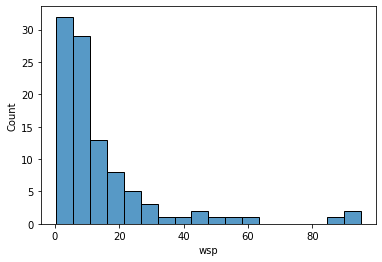

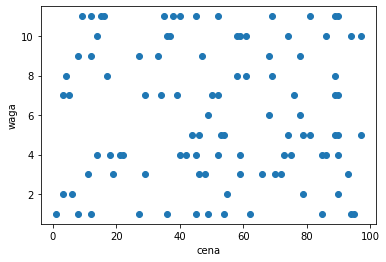

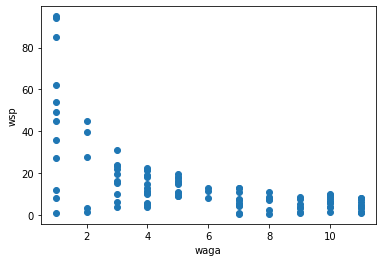

,cena,waga,wsp
0,95,1,95.0
1,94,1,94.0
2,85,1,85.0
3,62,1,62.0
4,54,1,54.0


In [1]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def get_price():
    return random.randrange(1, 100)

def get_weight():
    return random.randrange(1, 12)

items = set()
while len(items) < 100:
    items.add((get_price(), get_weight()))

items = [ [i[0],i[1], round(i[0]/i[1], 1)] for i in items] 

data = {
    'cena': [ i[0] for i in items],
    'waga': [ i[1] for i in items],
    'wsp': [ i[2] for i in items],
}

df = pd.DataFrame(data)

df = df.sort_values(by='wsp', ascending= False)

df.head(10)

sns.histplot(data=df, x="wsp")
plt.show()

plt.scatter(df['cena'], df['waga'])
plt.xlabel('cena')
plt.ylabel('waga')
plt.show()

plt.scatter(df['waga'], df['wsp'])
plt.xlabel('waga')
plt.ylabel('wsp')
plt.show()

df = df.reset_index(drop=True)
df.head()

In [2]:
plecak = 0
plecak_list = []
plecak_max = 30
items_sorted = sorted(items,key=lambda l:l[2], reverse=True)

while plecak <= 30:
    no_more_sace = True
    for i in items_sorted:
        if plecak + i[1] <= plecak_max:
            plecak += i[1]
            plecak_list.append(i)
            items_sorted.remove(i)
            break 
    
    for i in items_sorted:
        if plecak + i[1] <= plecak_max:
            no_more_sace = False
            
    if no_more_sace == True:
        break
        

print('plecak waga', plecak)
print('plecak lista:', plecak_list)

plecak waga 30
plecak lista: [[95, 1, 95.0], [94, 1, 94.0], [85, 1, 85.0], [62, 1, 62.0], [54, 1, 54.0], [49, 1, 49.0], [90, 2, 45.0], [45, 1, 45.0], [79, 2, 39.5], [36, 1, 36.0], [93, 3, 31.0], [55, 2, 27.5], [27, 1, 27.0], [72, 3, 24.0], [70, 3, 23.3], [90, 4, 22.5], [12, 1, 12.0], [8, 1, 8.0]]


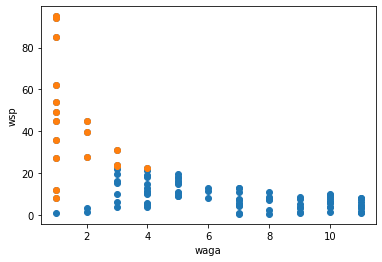

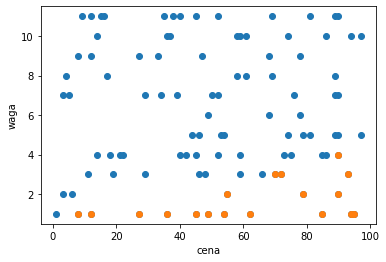

In [3]:
data = {
    'cena': [ i[0] for i in plecak_list],
    'waga': [ i[1] for i in plecak_list],
    'wsp': [ i[2] for i in plecak_list],
}

df_plecak = pd.DataFrame(data)

plt.scatter(df['waga'], df['wsp'])
plt.scatter(df_plecak['waga'], df_plecak['wsp'])
plt.xlabel('waga')
plt.ylabel('wsp')
plt.show()

plt.scatter(df['cena'], df['waga'])
plt.scatter(df_plecak['cena'], df_plecak['waga'])
plt.xlabel('cena')
plt.ylabel('waga')
plt.show()